# INFORMACIÓN DEL PROYECTO: JORGE ALONSO EDA

<div style="text-align: center;">
  <img src="./recursos/Automobile-Data.jpg" alt="Gráfico de ventas" width="700" />
</div>

### TÍTULO

**Estudio de datos almacenados por estaciones de carga para vehiculos eléctricos**

### TEMA

El tema principal es el estudio de los datos almacenados por puntos de recarga de coches eléctricos.

Para ello se va a utilizar el data set "Electric Vehicle Charging Patterns" estraido con una API de Kaggle. Los datos extraidos serán tratados y representados con el objetivo de estudar la forma en la que los conductores utilizan dichas estaciones de carga. Los datos extraidos son de conductores de EEUU durante los meses de enero y febrero de 2024. Las ciudades en las que se ubican los puntos de carga son: Houston, San Francisco, Los Angeles, Chicago y New York.

Los modelos de coches de os que se han recolectados los datos es de los 5 siguientes 5 vehículos: BMW i3, Hyundai Kona, Chevy Bolt, Nissan Leaf y Tesla Model 3. 


Este data set, se compone de un total de 20 columnas diferentes (cada una es un tipo de variable) y 1320 registros únicos de carga de EVs.

### HIPÓTESIS

Hipotesis 1: "Tesla es la marca más eficiente"<br>
Hipotesis 2: "~~Los cargadores de tipo DC Fast Charger son mas utilizados para distancias largas~~" <br>
Hipotesis 3: "Las ciudades con gran densidad de población, tienen mayor acceso a cargadores eléctricos, por lo que cargan más frecuentemente la batería del vehículo"

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

El siguiente data set sobre estaciones de carga de vehiculos eléctricos se muestra en bruto, es decir, se muestra tal cual ha sido descargado.

Durante el desarrollo del EDA se elavorará un proceso ETL, para poder sacar el máximo partido a este data set.

In [1]:
import hashlib
import requests
import datetime
import pandas as pd
import json
import kagglehub
from kagglehub import KaggleDatasetAdapter
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

c:\Users\Jorge_USR\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Descargar el data set de la api de kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files("valakhorasani/electric-vehicle-charging-patterns", path="apiVehiculos", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns


In [3]:
ds_evs = pd.read_csv('./apiVehiculos/ev_charging_patterns.csv')

In [4]:
ds_evs.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [5]:
ds_evs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [6]:
ds_evs["Vehicle Model"].unique()

array(['BMW i3', 'Hyundai Kona', 'Chevy Bolt', 'Nissan Leaf',
       'Tesla Model 3'], dtype=object)

In [7]:
ds_evs["Charging Station Location"].unique()

array(['Houston', 'San Francisco', 'Los Angeles', 'Chicago', 'New York'],
      dtype=object)

In [8]:
ds_evs["Charger Type"].unique()

array(['DC Fast Charger', 'Level 1', 'Level 2'], dtype=object)

### Comenzamos a limpizar y calcular nuevos datos a partir del Data Set principal ###

In [9]:
#Pasamos a formato fecha las columnas Charging Start Time y Charging End Time

ds_evs["Charging Start Time"] = pd.to_datetime(ds_evs["Charging Start Time"])
ds_evs["Charging End Time"] = pd.to_datetime(ds_evs["Charging End Time"])

print(ds_evs["Charging Start Time"].dtype)
print(ds_evs["Charging End Time"].dtype)

ds_evs["Charging Start Time"].dt.day
ds_evs["Charging Start Time"].dt.day

#Se lee cambiar el formato ("%d-%m-%Y") las letras en mayusculas ominusculas dependen de el formato que has puesto en el mes y en el año

datetime64[ns]
datetime64[ns]


0        1
1        1
2        1
3        1
4        1
        ..
1315    24
1316    24
1317    24
1318    24
1319    24
Name: Charging Start Time, Length: 1320, dtype: int32

In [10]:
# Creamos la columnas calculadas con nuevo análisis

#Porcentaje de carga registado
ds_evs["% charged"] = ds_evs["State of Charge (End %)"] - ds_evs["State of Charge (Start %)"]

#coste total de la recarga
ds_evs["Charging Energy Cost (USD /kW)"] = ds_evs["Charging Cost (USD)"] / ds_evs["Charging Rate (kW)"]

# Calcular eficiencia estimada: km por kWh recargado
ds_evs['Efficiency'] = ds_evs['Distance Driven (since last charge) (km)'] / (ds_evs['Battery Capacity (kWh)'] * ds_evs['% charged'] / 100)


In [11]:
#Mostrar todas las columnas
pd.set_option('display.max_columns', None)
ds_evs.head(5)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,% charged,Charging Energy Cost (USD /kW),Efficiency
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,56.748386,0.359660,4.770062
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,74.548566,0.688723,1.503889
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,63.063011,1.296351,1.518043
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,16.504325,0.396445,24.184908
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,9.484836,0.994690,42.944725


In [12]:
#Identificas variables numericas y categoricas

In [13]:
# En este paso eliminamos los registros cuyo porcentaje de carga total es menor al 0% o mayor al 100%.

# Este tipo de registros contienen datos que pueden afectar la calidad de nuestro dataset.
# La información pudo haberse registrado incorrectamente, o el proceso de carga del vehículo pudo haber presentado alguno de los siguientes problemas:

   #1 - Carga programada o diferida:  Si el coche tiene una carga programada para más tarde está enchufado pero no cargando, y mientras tanto puede usar algo de batería para sistemas internos.
   #2 - Consumo de sistemas auxiliares: Algunos sistemas como el climatizador, gestión térmica de la batería, o actualizaciones remotas.
   #3 - Problemas con el punto de carga y la corriente suministrada.
   #4 - Fallos del coche o del software: fallos en el sistema de gestión de batería (BMS) o bugs de software donde no se activa la carga correctamente aunque estén enchufados.

mascara_carga = (ds_evs["% charged"] >= 0) & (ds_evs["% charged"] <= 100)
ds_evs_clean = ds_evs[mascara_carga]

In [14]:
#Creamos una columna con las coordenadas de la ciudad, para poder realizar posteriormente un mapa con los datos registrados

#1 creamos diccionarios con las coordenadas de las fiudades:

coordenadas = {
    "Houston": (29.7604, -95.3698),
    "San Francisco": (37.7749, -122.4194),
    "Los Angeles": (34.0522, -118.2437),
    "Chicago": (41.8781, -87.6298),
    "New York": (40.7128, -74.0060)
}

#2 Columna nueva juntando las coordenadas en una misma celda

ds_evs_clean["Coordinates city"] = ds_evs_clean["Charging Station Location"].map(coordenadas)

#Vemos los cambios
ds_evs_clean.head(5)


C:\Users\Jorge_USR\AppData\Local\Temp\ipykernel_20772\3183317605.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,% charged,Charging Energy Cost (USD /kW),Efficiency,Coordinates city
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,56.748386,0.359660,4.770062,"(29.7604, -95.3698)"
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,74.548566,0.688723,1.503889,"(37.7749, -122.4194)"
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,63.063011,1.296351,1.518043,"(37.7749, -122.4194)"
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,16.504325,0.396445,24.184908,"(29.7604, -95.3698)"
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,9.484836,0.994690,42.944725,"(34.0522, -118.2437)"


In [15]:
#Info del data set limpio y con las nuevas columnas

ds_evs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1317
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User ID                                   1046 non-null   object        
 1   Vehicle Model                             1046 non-null   object        
 2   Battery Capacity (kWh)                    1046 non-null   float64       
 3   Charging Station ID                       1046 non-null   object        
 4   Charging Station Location                 1046 non-null   object        
 5   Charging Start Time                       1046 non-null   datetime64[ns]
 6   Charging End Time                         1046 non-null   datetime64[ns]
 7   Energy Consumed (kWh)                     987 non-null    float64       
 8   Charging Duration (hours)                 1046 non-null   float64       
 9   Charging Rate (kW)                 

In [16]:
#Clasificación de las diferentes variables que componen el Data Set EVs:

# Variables numéricas (float64)
variables_numericas = [
    "Battery Capacity (kWh)",
    "Energy Consumed (kWh)",
    "Charging Duration (hours)",
    "Charging Rate (kW)",
    "Charging Cost (USD)",
    "State of Charge (Start %)",
    "State of Charge (End %)",
    "Distance Driven (since last charge) (km)",
    "Temperature (°C)",
    "Vehicle Age (years)",
    "% charged",
    "Charging Energy Cost (USD /kW)", 
    "Efficiency"
]

# Variables categóricas (object)
variables_categoricas = [
    "User ID",
    "Vehicle Model",
    "Charging Station ID",
    "Charging Station Location",
    "Time of Day",
    "Day of Week",
    "Charger Type",
    "User Type",
    "Coordinates city"
]

# Variables temporales (datetime64[ns])
variables_temporales = [
    "Charging Start Time",
    "Charging End Time"
]

Importo el Data Set de densidad de población

In [17]:
#importamo el data set de densidad de población

ds_population = pd.read_csv('./Recursos/city_population_density.csv')
ds_population.head(5)

,City,Population Density (people/km²)
0,New York City,10896
1,Chicago,4656
2,Los Angeles,3180
3,San Francisco,2642
4,Houston,1400


In [18]:
#Creamos una columna con las coordenadas de la ciudad, para poder realizar posteriormente un mapa con los datos registrados

#1 creamos diccionarios con las coordenadas de las fiudades:

coordenadas = {
    "Houston": (29.7604, -95.3698),
    "San Francisco": (37.7749, -122.4194),
    "Los Angeles": (34.0522, -118.2437),
    "Chicago": (41.8781, -87.6298),
    "New York City": (40.7128, -74.0060)
}

#2 Columna nueva juntando las coordenadas en una misma celda

ds_population["Coordinates city"] = ds_population["City"].map(coordenadas)

In [19]:
#añadimos una columna que me de la suma total de kW suministrados en dicha ciudad

kw_per_city = ds_evs_clean.groupby("Coordinates city")["Charging Rate (kW)"].sum()

ds_population["Total kW supplied"] = ds_population["Coordinates city"].map(kw_per_city)

ds_population.head(5)

#Realozar un mapa de burbujar con estos datos

,City,Population Density (people/km²),Coordinates city,Total kW supplied
0,New York City,10896,"(40.7128, -74.006)",5076.359343
1,Chicago,4656,"(41.8781, -87.6298)",4841.254587
2,Los Angeles,3180,"(34.0522, -118.2437)",5342.723070
3,San Francisco,2642,"(37.7749, -122.4194)",5182.255187
4,Houston,1400,"(29.7604, -95.3698)",5206.961676


### Análisis gráfico ###

In [20]:
# Calcular datos
model_counts = ds_evs_clean['Vehicle Model'].value_counts()
total_cargas = model_counts.sum()
model_percentages = (model_counts / total_cargas * 100).round(2)

trace = go.Bar(
    x=model_counts.index,
    y=model_percentages.values,
    text=[f'{pct:.2f}%' for pct in model_percentages],
    textposition='outside',
    insidetextanchor='middle',
    # textfont: puedes dejar el color o quitar para que use el default
    hovertemplate=[
        f'{model}<br>{pct:.2f}% ({count} cargas)' 
        for model, pct, count in zip(model_counts.index, model_percentages, model_counts)
    ],
    # No asignamos marker.color ni line para heredar colores template
)

layout = go.Layout(
    title='Porcentaje de cargas por modelo de vehículo',
    xaxis=dict(title='Modelo de vehículo'),
    yaxis=dict(title='Porcentaje de cargas (%)',
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1),
    margin=dict(b=100),
    width=800,
    height=600,
    template='plotly_white'  # Aquí va el template
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)




Comparación de modelos de coche en función a las cargas realizadas:

- Tesla Model 3 es el más cargado (21.22%), pero solo ligeramente más que Hyundai Kona (20.84%) y Nissan Leaf (19.89%).

In [21]:
# Calcular datos
location_counts = ds_evs_clean['Charging Station Location'].value_counts()
total_locations = location_counts.sum()
location_percentages = (location_counts / total_locations * 100).round(2)

# Crear barra con color personalizado
trace = go.Bar(
    x=location_counts.index,
    y=location_percentages.values,
    text=[f'{pct:.2f}%' for pct in location_percentages],  # corregido aquí
    textposition='outside',
    insidetextanchor='middle',
    textfont=dict(color='#07032b'),
    hovertemplate=[
        f'{location}<br>{pct:.2f}% ({count} cargas)' 
        for location, pct, count in zip(location_counts.index, location_percentages, location_counts)
    ])


# Layout con tamaño ajustado
layout = go.Layout(
    title='Porcentaje de cargas por localización (ciudad)',
    xaxis=dict(title='Localización de la carga'),
    yaxis=dict(title='Porcentaje de localización (%)', 
               showgrid=True,
               gridcolor='lightgray',
               gridwidth=1),
    margin=dict(b=100),
    width=800,
    height=600,
    plot_bgcolor="#ffffff",
    paper_bgcolor='#ffffff'
)

fig = go.Figure(data=[trace], layout=layout)

print("❌ Gráfico que muestra el porcentaje (%) total de cargas que se realiza en cada una de las ciudades registradas por las estaciones de carga")

iplot(fig);


❌ Gráfico que muestra el porcentaje (%) total de cargas que se realiza en cada una de las ciudades registradas por las estaciones de carga


In [22]:
# Crear tabla pivote con conteo absoluto
pivot_table = pd.crosstab(ds_evs_clean['Charging Station Location'], ds_evs_clean['Vehicle Model'])

# Total general de cargas
total_cargas = pivot_table.values.sum()

# Calcular porcentaje de cada modelo sobre total general
pivot_percent_total = pivot_table.div(total_cargas) * 100

# Colores personalizados por modelo
model_colors = {
    'Tesla Model 3': '#CC0000',
    'Nissan Leaf': '#efefef',
    'Hyundai Kona': '#00287A',
    'Chevy Bolt': '#c5b358',
    'BMW i3': '#81C4FF'
}

# Crear trazas para cada modelo (columna)
data = []
for model in pivot_percent_total.columns:
    color = model_colors.get(model, '#888888')  # Color por defecto si no está en el diccionario
    trace = go.Bar(
        x=pivot_percent_total.index,
        y=pivot_percent_total[model],
        name=model,
        marker=dict(color=color),
        hovertemplate='%{x}<br>Modelo: ' + model + '<br>% Cargas: %{y:.2f}%',
    )
    data.append(trace)

# Layout del gráfico
layout = go.Layout(
    title='Porcentaje total de cargas por ciudad y modelo de vehículo',
    xaxis=dict(title='Ciudad'),
    yaxis=dict(title='Porcentaje de cargas (%) sobre total general', range=[0, 20], showgrid=True, gridcolor='lightgray'),
    barmode='stack',
    width=900,
    height=600,
    plot_bgcolor="#ffffff",
    paper_bgcolor='#ffffff'
)

# Crear figura y mostrar
print("✔️ Este gráfico muestra el porcentaje total de carga en cada ciudad y a su vez el porcentaje total de cargas por cada modelo de vehículo")
fig = go.Figure(data=data, layout=layout)
iplot(fig);




✔️ Este gráfico muestra el porcentaje total de carga en cada ciudad y a su vez el porcentaje total de cargas por cada modelo de vehículo


Cargas realizadas por modelo ciudades y por modelo de coche:

- Tesla Model 3 tiene presencia en todas las ciudades en las que hemos realizado el análisis. Destaca por encima del resto de vehiculos eléctricos en Nueva York y Chicago.

In [23]:
#Análisis de la eficencia con un boxplot:

# Filtrar valores muy altos para que los outlaters no distorsionen el gráfico
ds_filtered_efficency = ds_evs_clean[ds_evs_clean['Efficiency'] < 50]

fig = px.box(
    ds_filtered_efficency,
    x='Vehicle Model',
    y='Efficiency',
    points='outliers',
    title='Eficiencia por vehiculo (km por kWh cargado)',
    labels={
        'Efficiency': 'Eeficiencia (km/kWh)',
        'Vehicle Model': 'Modelo de vehículo'
    },
    template='plotly_white'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, 50], showgrid=True, gridcolor='lightgray'),
    width=900,
    height=600,
)

fig.show();



Comparación entre modelos de coches eléctricos y su eficiencia:

- Los modelos Chevrolet Bolt y Hyundai Kona presentan las medias de eficiencia más altas entre los vehículos analizados.
- Por el contrario, el Tesla Model 3 y el BMW i3 muestran un rendimiento menos eficiente. En particular, la eficiencia media del Tesla Model 3 está 0.94 puntos por debajo del modelo más eficiente (Hyundai Kona).
- En general, todos los modelos muestran niveles de eficiencia relativamente similares, lo cual se refleja en la disposición centrada de las cajas en el gráfico.
- Se observa una alta cantidad de valores atípicos (outliers) en todos los modelos, lo cual probablemente esté relacionado con los hábitos de carga de los usuarios.

### Análisis de correlaciones ###

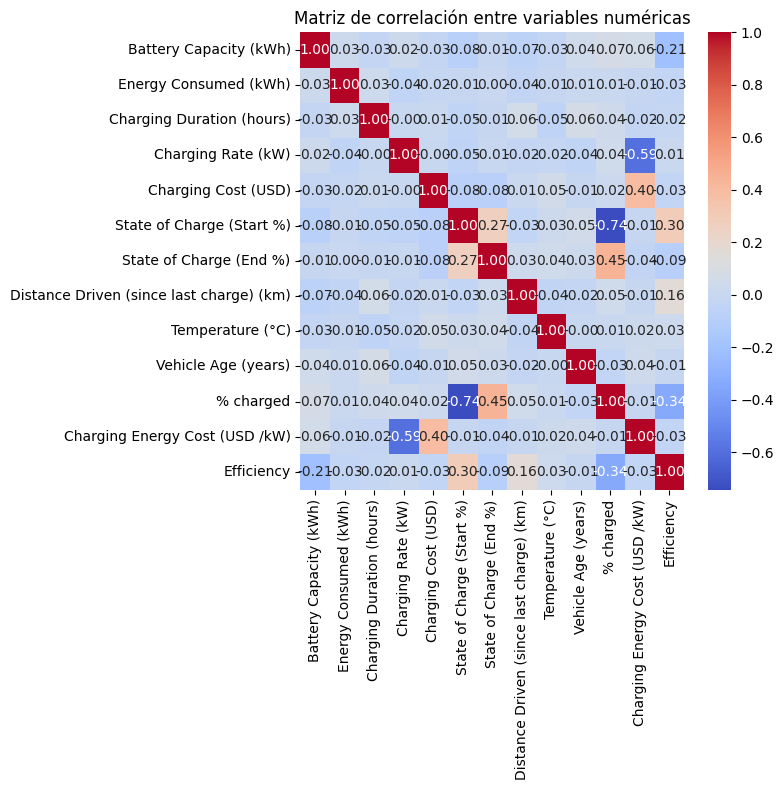

In [24]:
#Buscar correlaciones entre variables numericas

ds_correlacion = ds_evs_clean[variables_numericas].dropna()

corr_matrix = ds_correlacion.corr()


plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


La variable Distancia Driven, no presenta ningun tipo de relación con el resto de variables numéricas, por lo que no se puede utilizar este análisis para aceptar la hipótesis 2 ("Los cargadores de tipo DC Fast Charger son más utilizados para distancias largas").

Las variables que si muestran relacion son el % de carga del vehiculo con el precio pagado por la carga. Las demás relaciones que superan el 0,5 es debido a que se han usado para calñcular nuevas columnas. 

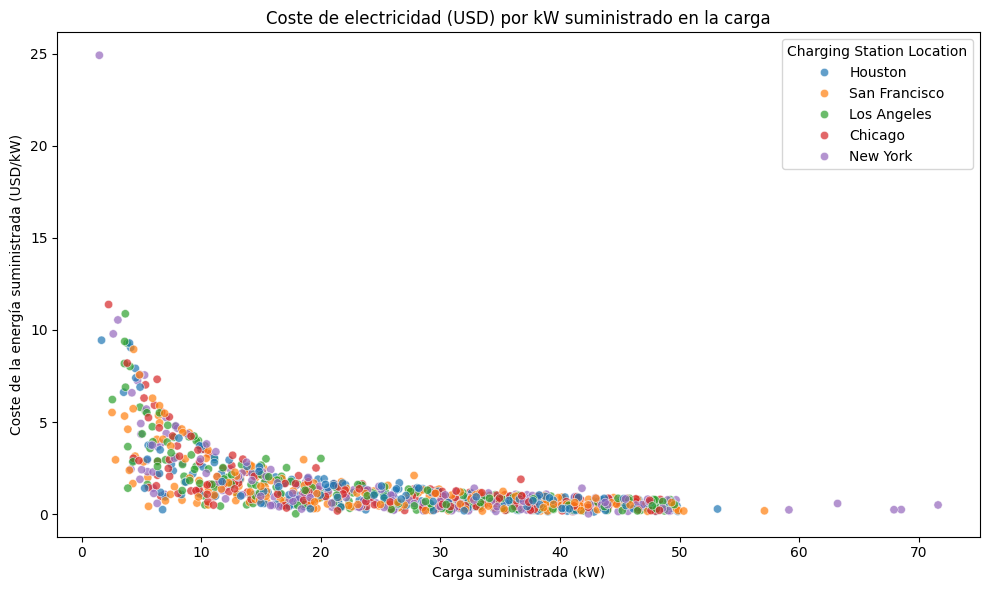

In [25]:
# Crear gráfico de dispersión con colores por ciudad
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=ds_evs_clean,
    x="Charging Rate (kW)",  # nombre correcto en inglés
    y="Charging Energy Cost (USD /kW)",  # nombre correcto en inglés
    hue="Charging Station Location",  # nombre correcto en inglés
    alpha=0.7
)

plt.title("Coste de electricidad (USD) por kW suministrado en la carga")
plt.xlabel("Carga suministrada (kW)")
plt.ylabel("Coste de la energía suministrada (USD/kW)")
plt.tight_layout()
plt.show()


Patrones obvervados en el gráfico:

- Existe una relación inversa entre las variables de carga suministrada y coste por kW. A medida que aumenta la tasa de carga (Charging Rate), el coste por kW tiende a disminuir.
- Alta variación en el coste de cargas más reducidas. Por debajo de los 1os 15 kW suministrados, las tarifas por kW oscilan mucho.
- Estabilización del precio por kW para las cargas a partir de los 20 kW, lo que s puede observar en una menor dispersión del precio por kW.
- No existe distinción entre ciudades, es decir todas tienen la misma tendencia en cuanto a la distribución de USD/kW y carga suministrada (kW).